In [3]:
from src.plotters import *

# 2D well
- histogram showing the distribution of energy values
- histogram showing the distribution of differences between nearest neighbor energy levels

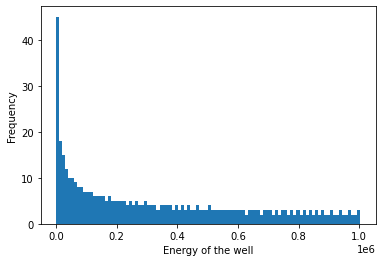

In [4]:
plot_energies('generated_data/2d/energies', 100)

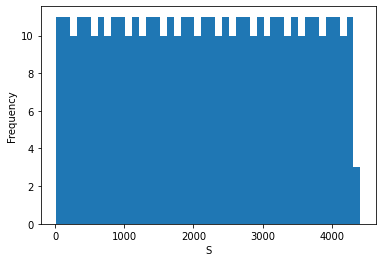

In [5]:
plot_energy_differences('generated_data/2d/endif', 100)

# 3D well
- histogram showing the distribution of energy values
- histogram showing the distribution of differences between nearest neighbor energy levels

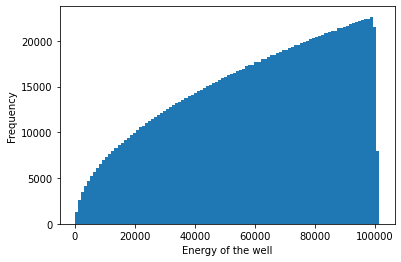

In [8]:
plot_energies('generated_data/3d/energies', 100)
# plot_energy_differences('generated_data/3d/endif', 100)

In [28]:
import scipy
from scipy.optimize import curve_fit
import numpy as np

energies = np.loadtxt("generated_data/3d/energies.txt")
energies_sorted = np.sort(energies)
cumulative_distribution = np.arange(1, len(energies_sorted) + 1) / len(energies_sorted)

#### Classical fit
- $f=3$ for 3D well 
$$\bar{N}(E) = \frac{V}{2\pi\hbar^2} \frac{(2\pi M E)^{f/2}}{\Gamma(\frac{f}{2}+1)}$$

In [9]:
def fit_func(x, a):
    return a * x**(3/2)

In [32]:
popt, _ = curve_fit(fit_func, energies_sorted, cumulative_distribution)
unfolded_energies = fit_func(energies, *popt)

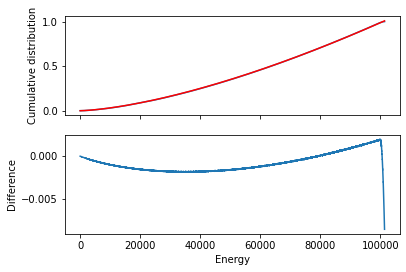

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the fit and data on the first subplot
ax1.plot(energies_sorted, cumulative_distribution, label='data')
ax1.plot(energies_sorted, fit_func(energies_sorted, *popt), 'r', label='analytical fit')
ax1.set_ylabel("Cumulative distribution")

# Plot the difference between fit and data on the second subplot
ax2.plot(energies_sorted, cumulative_distribution - fit_func(energies_sorted, *popt), label='difference')
ax2.set_xlabel("Energy")
ax2.set_ylabel("Difference")

# Display the plot
plt.show()

## Polynomial fit

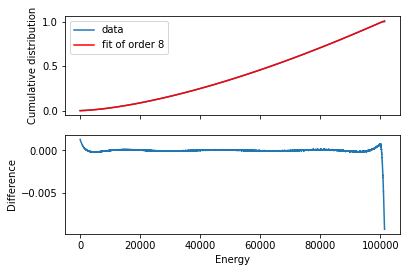

In [41]:
order=8
fit = np.polyfit(energies_sorted, cumulative_distribution, order)
fit_fn = np.poly1d(fit)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the fit and data on the first subplot
ax1.plot(energies_sorted, cumulative_distribution, label='data')
ax1.plot(energies_sorted, fit_fn(energies_sorted), 'r', label='fit of order ' + str(order))
ax1.set_ylabel("Cumulative distribution")

# Plot the difference between fit and data on the second subplot
ax2.plot(energies_sorted, cumulative_distribution - fit_fn(energies_sorted), label='difference')
ax2.set_xlabel("Energy")
ax2.set_ylabel("Difference")

# Display the plot
plt.show()